In [1]:
from os import listdir
from os.path import isfile, join
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

In [2]:
from altFACS.control import *

In [17]:
from altFACS.experiment import *

In [20]:
from altFACS.fluorescence import *

In [30]:
from altFACS.quad import *

In [3]:
## Load locally
mNG3_2 = pd.read_pickle("C:/Users/David Brown/Documents/PythonScripts_New/FACS/mNG3/mNG3_2_df.pkl")

In [4]:
mNG3_2

,File,FSC-A,FSC-H,FSC-W,SSC-A,405nm,488nm,Time
0,0,148712.937500,138704.0,70265.109375,94988.335938,25.800001,-7.540000,60.500000
1,0,112927.703125,113726.0,65075.976562,106024.000000,55.040001,5.800000,60.700001
2,0,208370.796875,178042.0,76699.820312,180417.687500,8827.900391,67.860001,60.799999
3,0,122729.843750,122454.0,65683.625000,77468.859375,1.720000,-8.120000,60.900002
4,0,109966.218750,111686.0,64526.855469,84123.195312,32136.480469,272.019989,60.900002
...,...,...,...,...,...,...,...,...
99995,9,18307.080078,25385.0,47263.062500,59231.917969,14.620000,44.660000,2414.000000
99996,9,114729.062500,114673.0,65568.046875,77917.781250,4.300000,-11.599999,2414.100098
99997,9,117521.718750,113538.0,67835.468750,135623.140625,42.139999,1.740000,2414.500000
99998,9,120549.445312,112249.0,70382.179688,113290.234375,5974.419922,236.059998,2414.600098


In [4]:
##Define a control
control = mNG3_2[mNG3_2.File.eq(7)]
control.head(50)

,File,FSC-A,FSC-H,FSC-W,SSC-A,405nm,488nm,Time
70000,7,115010.125000,119356.0,63149.773438,81895.414062,-14.620000,-11.599999,38.000000
70001,7,101162.281250,100525.0,65951.468750,90417.359375,19.780001,23.199999,38.599998
70002,7,182017.859375,172125.0,69302.671875,113279.218750,30.100000,20.299999,38.700001
70003,7,150034.984375,144769.0,67919.875000,110167.515625,6.880000,1.160000,39.099998
70004,7,198677.218750,145791.0,89309.429688,99304.117188,0.000000,0.000000,39.500000
70005,7,121606.523438,123495.0,64533.828125,105712.539062,13.760000,-6.380000,39.799999
70006,7,149630.187500,136758.0,71704.500000,124245.273438,11.180000,2.320000,39.900002
70007,7,31282.300781,37764.0,54287.601562,6796.439941,0.860000,19.139999,40.099998
70008,7,100903.765625,106456.0,62117.953125,58470.378906,3.440000,10.440000,40.299999
70009,7,106615.578125,108549.0,64368.707031,66352.578125,18.059999,29.000000,40.599998


In [5]:
##Update limits
limit_dict = {}
limit_dict['FSC-A'] = {'upper_limit': 262143.0, 'lower_limit': 0}
limit_dict['FSC-H'] = {'upper_limit': 262143.0, 'lower_limit': 0}
limit_dict['FSC-W'] = {'upper_limit': 262143.0, 'lower_limit': 0}
limit_dict['SSC-A'] = {'upper_limit': 262143.0, 'lower_limit': 0}
limit_dict['405nm'] = {'upper_limit': 262143.0, 'lower_limit': 0}
limit_dict['488nm'] = {'upper_limit': 262143.0, 'lower_limit': 0}

In [8]:
settings = {'plot': True, 'save': False, 'savepath': 'mNG3/mNG3_2_', 'verbose' : True, 'contour': 3, 'limit_dict': limit_dict}

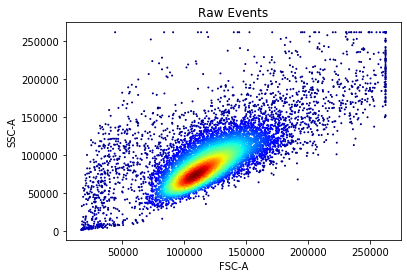

Input events = 10000
Removing FSC-A saturation
Removing FSC-H saturation
Removing FSC-W saturation
Removing SSC-A saturation
Removing 405nm saturation
Removing 488nm saturation
Unsaturated events = 5319
Control has 5319  unsaturated events
53.19 % of total events remaining


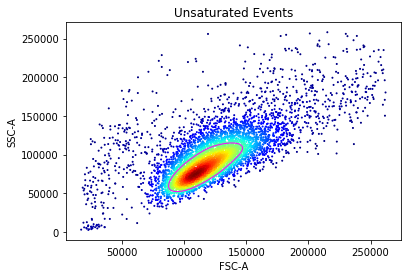

Scatter gated events = 2447
Control has 2447  scatter gated events
24.47 % of total events remaining
The singlet threshold is 0.938971871137619


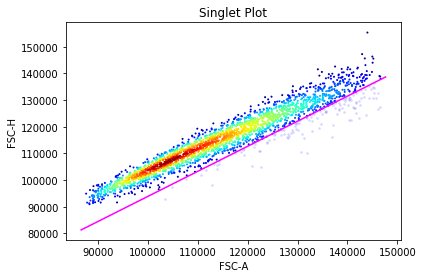

Singlet gated events = 4119
Control has 4119  singlet events
41.19 % of total events remaining


In [9]:
singlet_threshold, poly, event_gating, singlets = processControl(control, **settings)

In [6]:
settings = {'plot': True, 'save': False, 'savepath': 'mNG3/mNG3_2_', 'verbose' : True, 'contour': 3, 'limit_dict': limit_dict, 'squareplot': True}

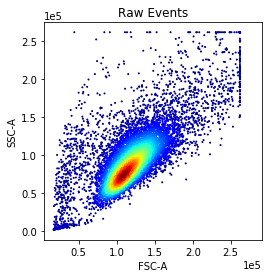

Input events = 10000
Removing FSC-A saturation
Removing FSC-H saturation
Removing FSC-W saturation
Removing SSC-A saturation
Removing 405nm saturation
Removing 488nm saturation
Unsaturated events = 5319
Control has 5319  unsaturated events
53.19 % of total events remaining


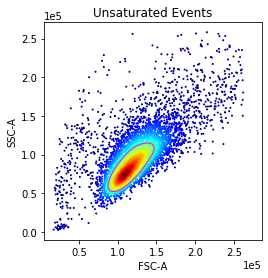

Scatter gated events = 2447
Control has 2447  scatter gated events
24.47 % of total events remaining
The singlet threshold is 0.938971871137619


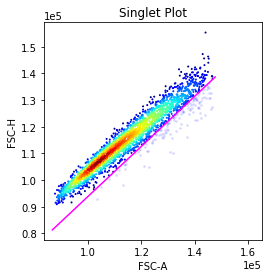

Singlet gated events = 4119
Control has 4119  singlet events
41.19 % of total events remaining


In [7]:
singlet_threshold, poly, event_gating, singlets = processControl(control, **settings)

In [18]:
mNG3_2_singlets = processExperiment(mNG3_2, limit_dict, poly, singlet_threshold)

Input events = 100000
Removing FSC-A saturation
Removing FSC-H saturation
Removing FSC-W saturation
Removing SSC-A saturation
Removing 405nm saturation
Removing 488nm saturation
Unsaturated events = 72779
Scatter gated events = 38081
Singlet gated events = 58186


In [22]:
fluorescence_channels = ['405nm', '488nm']

In [23]:
#Transform fluorescence channels
mNG3_2_log10_singlets = transformFluorescenceChannels(mNG3_2_singlets, fluorescence_channels, np.log10)

In [24]:
mNG3_2_log10_singlets

,File,FSC-A,FSC-H,FSC-W,SSC-A,405nm,488nm,Time,Scatter+,Singlet+
1,0,112927.703125,113726.0,65075.976562,106024.000000,1.740678,0.763428,60.700001,True,True
4,0,109966.218750,111686.0,64526.855469,84123.195312,4.506999,2.434601,60.900002,True,True
7,0,114569.898438,118346.0,63444.925781,91815.734375,0.888741,1.178401,62.099998,True,True
9,0,84020.382812,87309.0,63067.500000,64092.316406,0.975891,1.178401,62.599998,True,True
13,0,107948.203125,109632.0,64529.457031,59311.378906,3.856029,1.526856,63.599998,True,True
...,...,...,...,...,...,...,...,...,...,...
99982,9,104789.382812,109433.0,62755.085938,95894.875000,3.706012,2.566202,2410.800049,True,True
99985,9,121877.921875,122428.0,65241.539062,76735.734375,0.837588,1.240549,2411.399902,True,True
99988,9,124351.343750,125932.0,64713.414062,114304.078125,4.251119,2.246302,2412.399902,True,True
99993,9,135895.046875,132397.0,67267.515625,99042.539062,3.905217,3.073696,2413.899902,True,True


In [16]:
## Save locally
#mNG3_2_log10_singlets.to_pickle("C:/Users/David Brown/Documents/PythonScripts_New/FACS/mNG3/mNG3_2_log10_singlets_df.pkl")

In [3]:
## Load locally
mNG3_2_log10_singlets = pd.read_pickle("C:/Users/David Brown/Documents/PythonScripts_New/FACS/mNG3/mNG3_2_log10_singlets_df.pkl")

In [25]:
control_singlets = mNG3_2_log10_singlets[mNG3_2_log10_singlets.File.eq(7)]

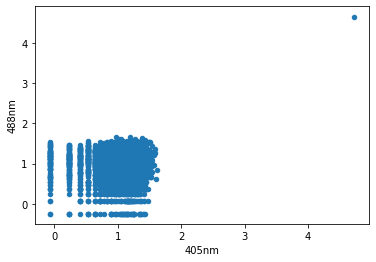

In [26]:
control_singlets.plot.scatter('405nm', '488nm');

In [6]:
fluorescence_channels =['405nm', '488nm']

In [27]:
##Threshold control
thresholds = autothreshold(control_singlets, channels=fluorescence_channels, percentile=0.999)

In [28]:
thresholds

{'405nm': 1.587710976600647, '488nm': 1.6324335882663752}

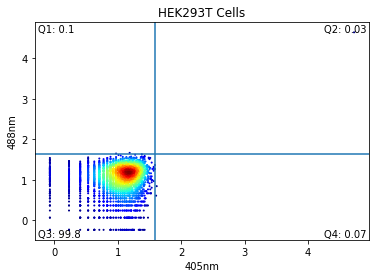

In [31]:
quadPlot(control_singlets, '405nm', thresholds['405nm'], '488nm', thresholds['488nm'], x_limits=(-1,5), y_limits=(-1,5))
plt.title('HEK293T Cells');

In [11]:
file_info = pd.DataFrame()
file_info['File'] = list(range(10))
file_info['Description'] = ['Clover(1-10) + FP11_CLTA_P2A_BFP', 
                            'CloGFP(1-10) only', 
                            'CloGFP split',
                            'CloGFP split with mutation in FP11',
                            'fl_sfGFP',
                            'mNG3K(1-10) only',
                            'mNG3K split',
                            'Negative control', 
                            'sfGFP1-10 only',
                            'sfGFP split']

In [12]:
file_info

,File,Description
0,0,Clover(1-10) + FP11_CLTA_P2A_BFP
1,1,CloGFP(1-10) only
2,2,CloGFP split
3,3,CloGFP split with mutation in FP11
4,4,fl_sfGFP
5,5,mNG3K(1-10) only
6,6,mNG3K split
7,7,Negative control
8,8,sfGFP1-10 only
9,9,sfGFP split


In [22]:
def quickQuad(df, file_number, x_channel, y_channel, threshold_dict):
    
    data = df[df.File.eq(file_number)]
    
    quadPlot(data, x_channel, threshold_dict[x_channel], y_channel, threshold_dict[y_channel], x_limits=(-1,5), y_limits=(-1,5))
    plt.title(file_info.loc[file_number, 'Description']);
    plt.xlim(0,6);
    plt.ylim(0,6);
    plt.gca().set_aspect('equal');

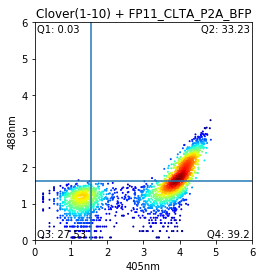

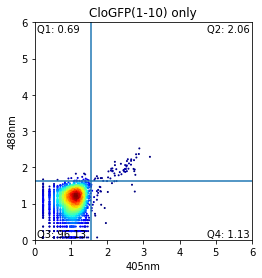

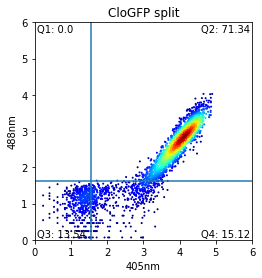

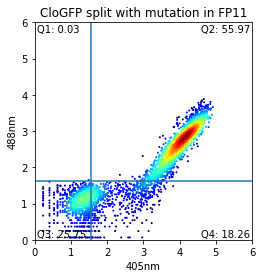

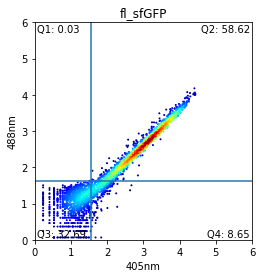

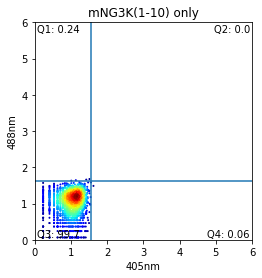

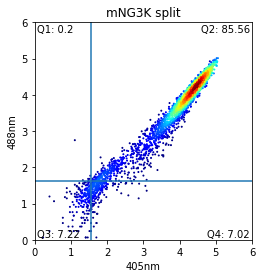

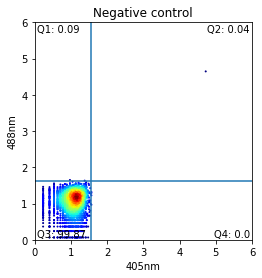

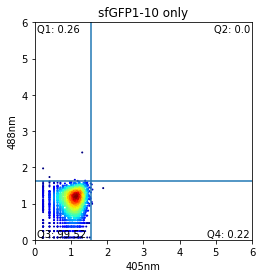

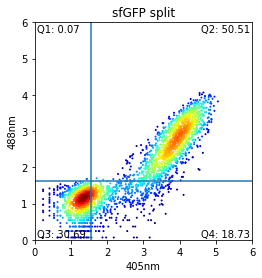

In [23]:
for file_num in file_info.File:
    quickQuad(mNG3_2_log10_singlets, file_num, '405nm', '488nm', thresholds)
    plt.show()

In [32]:
##Add fluorescent gates
channelGate(mNG3_2_log10_singlets, channels=fluorescence_channels, thresholds_dict=thresholds)

,File,FSC-A,FSC-H,FSC-W,SSC-A,405nm,488nm,Time,Scatter+,Singlet+,405nm+,488nm+
1,0,112927.703125,113726.0,65075.976562,106024.000000,1.740678,0.763428,60.700001,True,True,True,False
4,0,109966.218750,111686.0,64526.855469,84123.195312,4.506999,2.434601,60.900002,True,True,True,True
7,0,114569.898438,118346.0,63444.925781,91815.734375,0.888741,1.178401,62.099998,True,True,False,False
9,0,84020.382812,87309.0,63067.500000,64092.316406,0.975891,1.178401,62.599998,True,True,False,False
13,0,107948.203125,109632.0,64529.457031,59311.378906,3.856029,1.526856,63.599998,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
99982,9,104789.382812,109433.0,62755.085938,95894.875000,3.706012,2.566202,2410.800049,True,True,True,True
99985,9,121877.921875,122428.0,65241.539062,76735.734375,0.837588,1.240549,2411.399902,True,True,False,False
99988,9,124351.343750,125932.0,64713.414062,114304.078125,4.251119,2.246302,2412.399902,True,True,True,True
99993,9,135895.046875,132397.0,67267.515625,99042.539062,3.905217,3.073696,2413.899902,True,True,True,True


In [33]:
transfected_mNG3_2_log10_singlets = mNG3_2_log10_singlets[mNG3_2_log10_singlets['405nm+']==True]

In [34]:
%load_ext autoreload

In [36]:
from altFACS.lines import *
%aimport altFACS.lines

In [ ]:
## Fit a 1:1 control sample.

In [37]:
# Define 1:1 control
fl_sfGFP = transfected_mNG3_2_log10_singlets[transfected_mNG3_2_log10_singlets.File.eq(4)]

In [38]:
slope, intercept, r_value, p_value, std_err = stats.linregress(fl_sfGFP['405nm'], fl_sfGFP['488nm'])
print("slope:%f intercept:%f p_value: %f std_err:%f " % (slope, intercept, p_value, std_err))

slope:0.985730 intercept:-0.348334 p_value: 0.000000 std_err:0.003882 


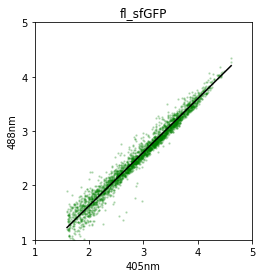

In [39]:
plotFit(fl_sfGFP, '405nm', '488nm', c='g', linecolor='k')
plt.xlim(1,5);
plt.ylim(1,5);
plt.yticks([1,2,3,4,5])
plt.xlabel('405nm');
plt.ylabel('488nm');
plt.gca().set_aspect('equal');
plt.title('fl_sfGFP');

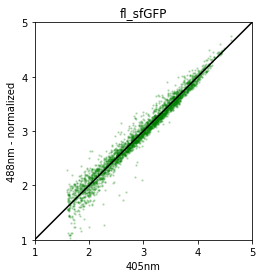

In [40]:
#Simple rescaled plot, BUT we want Fits.

rescalePlot(fl_sfGFP, '405nm', '488nm', slope, intercept)
plt.title('fl_sfGFP');

In [29]:
#Add a new column for the rescaled values
transfected_mNG3_2_log10_singlets.loc[:,'488nm - normalized'] = rescale(transfected_mNG3_2_log10_singlets.loc[:,'488nm'], slope, intercept)

In [54]:
transfected_mNG3_2_log10_singlets.tail()

,File,FSC-A,FSC-H,FSC-W,SSC-A,405nm,488nm,Time,Scatter+,Singlet+,405nm+,488nm+,488nm - normalized
99968,9,109148.804688,113004.0,63300.199219,82420.320312,2.159808,1.365488,2405.899902,True,True,True,False,1.744631
99976,9,97396.265625,101414.0,62939.652344,65250.000000,2.940536,1.707911,2408.500000,True,True,True,True,2.091599
99977,9,107115.140625,109306.0,64222.441406,88665.179688,3.988038,3.092215,2409.100098,True,True,True,True,3.494278
99981,9,120833.265625,118950.0,66573.593750,106882.398438,2.637790,1.595937,2410.500000,True,True,True,False,1.978139
99993,9,135895.046875,132397.0,67267.515625,99042.539062,3.905217,3.073696,2413.899902,True,True,True,True,3.475514


In [ ]:
# I need a few options.
# [1] rescalePlot
# [2] rescalePlot + linear fit
# [3] rescalePlot + piecewise fit
# [4] rescalePlot + piecewise fit with fixed 'k1' gradient
# [5] rescalePlot + cropped fit

slope:0.526708 intercept:0.031329 p_value: 0.000000 std_err:0.012468 


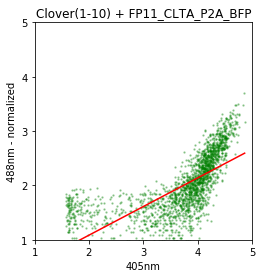

In [75]:
#Simple linear regression is not a good fit.

file_num = 0

data = transfected_mNG3_2_log10_singlets[transfected_mNG3_2_log10_singlets.File.eq(file_num)]

x=data['405nm']
y=data['488nm - normalized']

plt.scatter(x, y, s=2, alpha=0.3, c='green')
plt.xlim(1,5);
plt.ylim(1,5);
plt.yticks([1,2,3,4,5]);

#Set the axis to be equal
plt.gca().set_aspect('equal');

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope:%f intercept:%f p_value: %f std_err:%f " % (slope, intercept, p_value, std_err))

xx = pd.Series([x.min(), x.max()])

yy = xx.apply(lambda xx: slope*xx+intercept)

plt.plot(xx, yy, c='red');
plt.title(file_info.loc[file_num, 'Description']);
plt.xlabel('405nm');
plt.ylabel('488nm - normalized');

#Obviously a bad fit

slope:0.943430 intercept:-0.683442 p_value: 0.000000 std_err:0.008137 


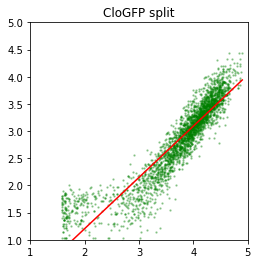

In [46]:
file_num = 2

data = transfected_mNG3_2_log10_singlets[transfected_mNG3_2_log10_singlets.File.eq(file_num)]

x=data['405nm']
y=data['488nm - normalized']

plt.scatter(x, y, s=2, alpha=0.3, c='green')
plt.xlim(1,5);
plt.ylim(1,5);
plt.yticks([1,2,3,4,5]);

#Set the axis to be equal
plt.gca().set_aspect('equal');

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope:%f intercept:%f p_value: %f std_err:%f " % (slope, intercept, p_value, std_err))

xx = pd.Series([x.min(), x.max()])

yy = xx.apply(lambda xx: slope*xx+intercept)

plt.plot(xx, yy, c='red');
plt.title(file_info.loc[file_num, 'Description']);
#Obviously a bad fit

slope:1.058795 intercept:-0.122949 p_value: 0.000000 std_err:0.004322 


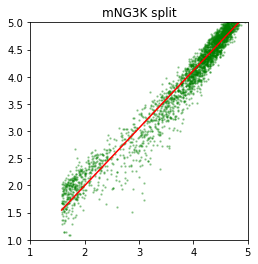

In [48]:
file_num = 6

data = transfected_mNG3_2_log10_singlets[transfected_mNG3_2_log10_singlets.File.eq(file_num)]

x=data['405nm']
y=data['488nm - normalized']

plt.scatter(x, y, s=2, alpha=0.3, c='green')
plt.xlim(1,5);
plt.ylim(1,5);
plt.yticks([1,2,3,4,5]);

#Set the axis to be equal
plt.gca().set_aspect('equal');

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope:%f intercept:%f p_value: %f std_err:%f " % (slope, intercept, p_value, std_err))

xx = pd.Series([x.min(), x.max()])

yy = xx.apply(lambda xx: slope*xx+intercept)

plt.plot(xx, yy, c='red');
plt.title(file_info.loc[file_num, 'Description']);
#Obviously a bad fit

slope:0.885548 intercept:-0.371095 p_value: 0.000000 std_err:0.011844 


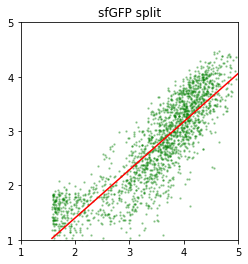

In [76]:
file_num = 9

data = transfected_mNG3_2_log10_singlets[transfected_mNG3_2_log10_singlets.File.eq(file_num)]

x=data['405nm']
y=data['488nm - normalized']

plt.scatter(x, y, s=2, alpha=0.3, c='green')
plt.xlim(1,5);
plt.ylim(1,5);
plt.yticks([1,2,3,4,5]);

#Set the axis to be equal
plt.gca().set_aspect('equal');

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope:%f intercept:%f p_value: %f std_err:%f " % (slope, intercept, p_value, std_err))

xx = pd.Series([x.min(), x.max()])

yy = xx.apply(lambda xx: slope*xx+intercept)

plt.plot(xx, yy, c='red');
plt.title(file_info.loc[file_num, 'Description']);
#Obviously a bad fit

In [81]:
df = transfected_mNG3_2_log10_singlets

x='405nm'
y='488nm - normalized'

In [103]:
## With fixed gradient
def zeroSlopeFirst(df: pd.DataFrame, file_num: int, x: str, y: str, **kwargs):
    
    data = df[df.File.eq(file_num)]

    x=data[x]
    y=data[y]

    s     = kwargs.get('s', 2)
    c     = kwargs.get('c', 'green')
    alpha = kwargs.get('s', 0.1)

    p0       = kwargs.get('p0', [3.5, 2.5, 1])  #Initial guesses
    k1_fixed = kwargs.get('k1_fixed', 0)        #Fixed gradient   

    plt.scatter(x, y, s=s, alpha=alpha, c=c)
    plt.xlim(1,5);
    plt.ylim(1,5);
    plt.yticks([1,2,3,4,5]);

    #Set the axis to be equal
    plt.gca().set_aspect('equal');

    x = np.array(x)
    y = np.array(y)

    #Use fixed_k1 to fix the first gradient 'k1'

    def fixed_k1(x, params):
        
        x0 = params[0]
        y0 = params[1]
        k2 = params[2] 
        
        return piecewise_linear(x, x0, y0, k1_fixed, k2)
    
    popt , pcov = optimize.curve_fit(fixed_k1(x, p0), x, y, p0)

    #get parameters
    x0, y0, k2 = popt

    xd = np.linspace(x.min(), x.max(), 100)

    plt.plot(xd, piecewise_linear(xd, x0, y0, k1_fixed, k2), c='r');
    plt.title(file_info.loc[file_num, 'Description']);

    return k1_fixed, k2, x0, e

In [117]:
def zeroSlopeFirst(df: pd.DataFrame, file_num: int, x: str, y: str, **kwargs):
    
    data = df[df.File.eq(file_num)]

    x=data[x]
    y=data[y]

    s     = kwargs.get('s', 2)
    c     = kwargs.get('c', 'green')
    alpha = kwargs.get('s', 0.1)

    p0       = kwargs.get('p0', [3.5, 2.5, 1])  #Initial guesses
    k1_fixed = kwargs.get('k1_fixed', 0)        #Fixed gradient   

    plt.scatter(x, y, s=s, alpha=alpha, c=c)
    plt.xlim(1,5);
    plt.ylim(1,5);
    plt.yticks([1,2,3,4,5]);

    #Set the axis to be equal
    plt.gca().set_aspect('equal');

    x = np.array(x)
    y = np.array(y)

    #Use lambda to fix the first gradient 'k1'
    popt , e = optimize.curve_fit(lambda x, x0, y0, k2: piecewise_linear(x, x0, y0, k1_fixed, k2), x, y, p0)

    #get parameters
    x0, y0, k2 = popt

    xd = np.linspace(x.min(), x.max(), 100)

    plt.plot(xd, piecewise_linear(xd, x0, y0, k1_fixed, k2), c='r');
    
    #get the residual sum of squares (ss_res)
    residuals = y - piecewise_linear(x, x0, y0, k1_fixed, k2)
    
    ss_res = np.sum(residuals**2)
    
    #get the total sum of squares (ss_tot)
    ss_tot = np.sum((y-np.mean(y))**2)
    
    #get R-squared
    r_value = 1 - (ss_res / ss_tot)
        
    #calculate p_value
    return k1_fixed, k2, x0, r_value

Gradient 1 = 0
Gradient 2 = 1.2738619454522757
Inflection Point = 2.704048426096627
R-squared = 0.883360393345356


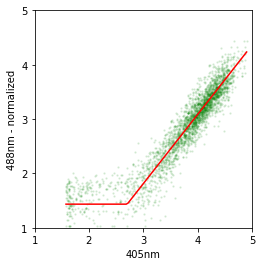

In [118]:
df = transfected_mNG3_2_log10_singlets

k1_fixed, k2, x0, r_value = zeroSlopeFirst(df, 2, x, y)

plt.xlabel('405nm');
plt.ylabel('488nm - normalized');

print('Gradient 1 =', k1_fixed)
print('Gradient 2 =', k2)
print('Inflection Point =', x0)
print('R-squared =', r_value)

In [114]:
#The GFP laser is higher in this case than in the mNG3 dataset shifting the intercept

In [66]:
##What if you double gate?
double = transfected_mNG3_2_log10_singlets[transfected_mNG3_2_log10_singlets['488nm+']]

In [92]:
def fitGated(df: pd.DataFrame, file_num: int, x_channel: str, y_channel: str, **kwargs):
    """
    Plot and fit data accurately despite a sharp artifical cut off.
    
    FACS data are often threshold gated, which produces a sharp artificial cut off. 
    This can generate asymmetry (which fitting algorithms expect in y, but not in x),
    which biases the linear regression. One way to overcome this issue is to swap the axis before fitting, 
    and then reverse our equation.
    
    """
    
    s     = kwargs.get('s', 2)
    c     = kwargs.get('c', 'green')
    alpha = kwargs.get('s', 0.1)
    
    
    data = double[double.File.eq(file_num)]
    
    x=data[x_channel]
    y=data[y_channel]

    plt.scatter(x, y, s=s, alpha=alpha, c=c)
    plt.xlim(1,5);
    plt.ylim(1,5);
    plt.yticks([1,2,3,4,5]);
    plt.xlabel(x_channel);
    plt.ylabel(y_channel); 

    #Set the axis to be equal
    plt.gca().set_aspect('equal');

    #Fit y against x
    slope, intercept, r_value, p_value, std_err = stats.linregress(y, x)
    
    gradient = 1/slope
    offset   = -intercept/slope
    
    print("slope:%f intercept:%f p_value: %f std_err:%f " % (gradient, offset, p_value, std_err))

    xx = pd.Series([x.min(), x.max()])

    yy = xx.apply(lambda xx: gradient*xx+offset)

    plt.plot(xx, yy, c='red');
    plt.title(file_info.loc[file_num, 'Description']);
    
    return gradient, offset, p_value, std_err

slope:1.405913 intercept:-2.517276 p_value: 0.000000 std_err:0.006770 
Gradient = 1.4059126772608765
Intercept = -2.5172756447503626
p-value = 0.0
Standard Error = 0.006769687104333754


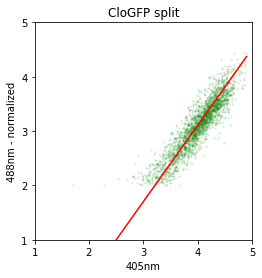

In [95]:
x='405nm'
y='488nm - normalized'

df = double

gradient, offset, p_value, std_err = fitGated(df, 2, x, y)

print('Gradient =', gradient)
print('Intercept =', offset)
print('p-value =', p_value)
print('Standard Error =', std_err)

slope:1.891152 intercept:-5.472189 p_value: 0.000000 std_err:0.014824 


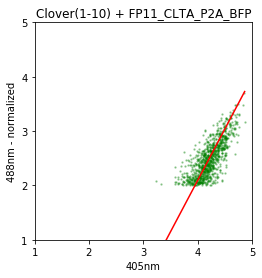

slope:1.405913 intercept:-2.517276 p_value: 0.000000 std_err:0.006770 


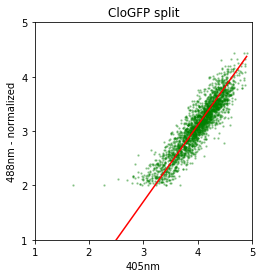

slope:1.118581 intercept:-0.356565 p_value: 0.000000 std_err:0.004362 


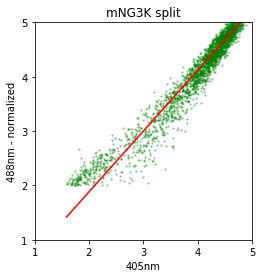

slope:1.546611 intercept:-2.861423 p_value: 0.000000 std_err:0.014048 


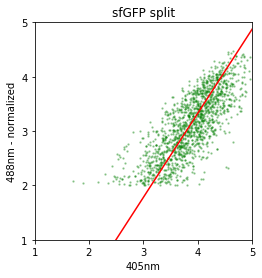

In [174]:
for file_num in [0, 2, 6, 9]:
    data = double[double.File.eq(file_num)]
    fitGated(data, '405nm', '488nm - normalized')
    plt.show()

In [ ]:
##What about classic overlay plot

In [30]:
from alternativeFACS.alternativeFACS.helpers.overlay import *

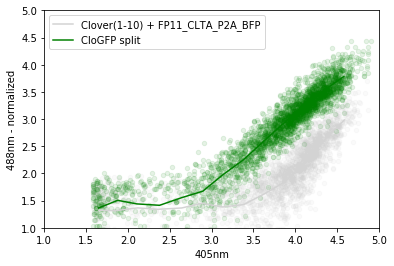

In [31]:
control_file_num = 0
experiment_file_num = 2

experiment = transfected_mNG3_2_log10_singlets[transfected_mNG3_2_log10_singlets.File.eq(experiment_file_num)]

control = transfected_mNG3_2_log10_singlets[transfected_mNG3_2_log10_singlets.File.eq(control_file_num)]

labels = list()
labels.append(file_info.loc[control_file_num, 'Description'])
labels.append(file_info.loc[experiment_file_num, 'Description'])

settings = {'xlim': (1,5), 'ylim': (1,5), 'bins': np.arange(0, 5, 0.25), 'labels': labels}

overlayPlot(control, experiment, '405nm', '488nm - normalized', **settings)

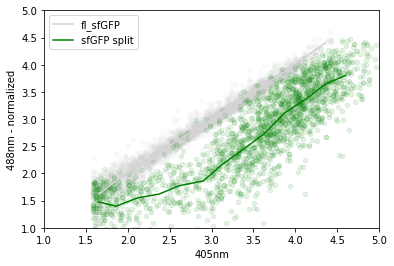

In [32]:
control_file_num = 4
experiment_file_num = 9

experiment = transfected_mNG3_2_log10_singlets[transfected_mNG3_2_log10_singlets.File.eq(experiment_file_num)]

control = transfected_mNG3_2_log10_singlets[transfected_mNG3_2_log10_singlets.File.eq(control_file_num)]

labels = list()
labels.append(file_info.loc[control_file_num, 'Description'])
labels.append(file_info.loc[experiment_file_num, 'Description'])

settings = {'xlim': (1,5), 'ylim': (1,5), 'bins': np.arange(0, 5, 0.25), 'labels': labels}

overlayPlot(control, experiment, '405nm', '488nm - normalized', **settings)

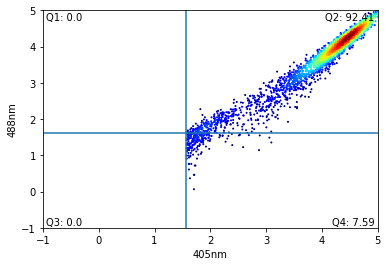

In [31]:
mNG3K = transfected_mNG3_2_log10_singlets[transfected_mNG3_2_log10_singlets.File.eq(6)]
quadPlot(mNG3K, '405nm', thresholds['405nm'], '488nm', thresholds['488nm'], x_limits=(-1,5), y_limits=(-1,5))

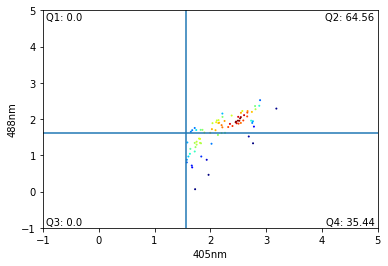

In [33]:
File1 = transfected_mNG3_2_log10_singlets[transfected_mNG3_2_log10_singlets.File.eq(1)]
quadPlot(File1, '405nm', thresholds['405nm'], '488nm', thresholds['488nm'], x_limits=(-1,5), y_limits=(-1,5))

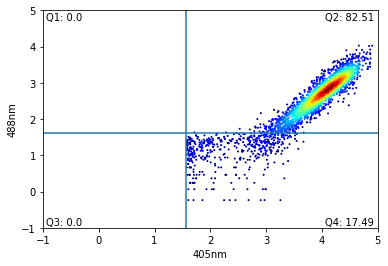

In [34]:
File2 = transfected_mNG3_2_log10_singlets[transfected_mNG3_2_log10_singlets.File.eq(2)]
quadPlot(File2, '405nm', thresholds['405nm'], '488nm', thresholds['488nm'], x_limits=(-1,5), y_limits=(-1,5))

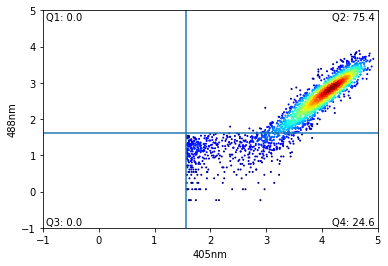

In [35]:
File3 = transfected_mNG3_2_log10_singlets[transfected_mNG3_2_log10_singlets.File.eq(3)]
quadPlot(File3, '405nm', thresholds['405nm'], '488nm', thresholds['488nm'], x_limits=(-1,5), y_limits=(-1,5))

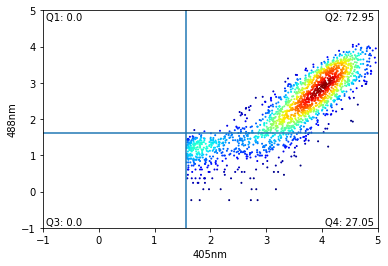

In [47]:
sfGFP = transfected_mNG3_2_log10_singlets[transfected_mNG3_2_log10_singlets.File.eq(9)]
quadPlot(sfGFP, '405nm', thresholds['405nm'], '488nm', thresholds['488nm'], x_limits=(-1,5), y_limits=(-1,5))

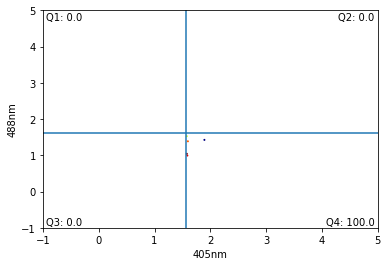

In [37]:
sfGFP_split = transfected_mNG3_2_log10_singlets[transfected_mNG3_2_log10_singlets.File.eq(8)]
quadPlot(sfGFP_split, '405nm', thresholds['405nm'], '488nm', thresholds['488nm'], x_limits=(-1,5), y_limits=(-1,5))

In [26]:
# Fit trendline
#use linear regression function from scipy package
from scipy import stats

In [39]:
slope, intercept, r_value, p_value, std_err = stats.linregress(fl_sfGFP['405nm'], fl_sfGFP['488nm'])
print("slope:%f intercept:%f p_value: %f std_err:%f " % (slope, intercept, p_value, std_err))
k = slope
b = intercept
std = std_err

slope:0.986900 intercept:-0.356289 p_value: 0.000000 std_err:0.004568 


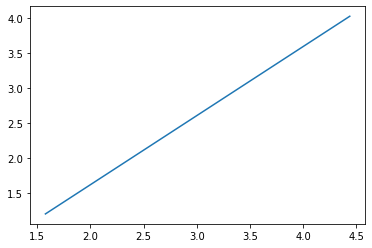

In [40]:
#sort x
x = fl_sfGFP['405nm'].sort_values()

plt.plot(x, (k*x+b));

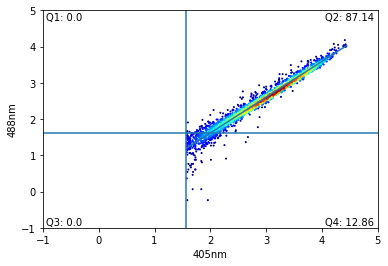

In [41]:
# Simple overlay works now!
quadPlot(fl_sfGFP, '405nm', thresholds['405nm'], '488nm', thresholds['488nm'], x_limits=(-1,5), y_limits=(-1,5));
plt.plot(x, (k*x+b));

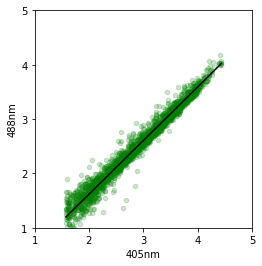

In [43]:
fl_sfGFP.plot('405nm', '488nm', kind='scatter', c='green', alpha=0.2);
plt.plot(x, (k*x+b), c='black');
plt.xlim(1,5);
plt.ylim(1,5);
plt.yticks([1,2,3,4,5]);
plt.gca().set_aspect('equal')

In [38]:
sfGFP11_CLTA_BFP = transfected_mNG3_1_log10_singlets[transfected_mNG3_1_log10_singlets.File.eq(0)]

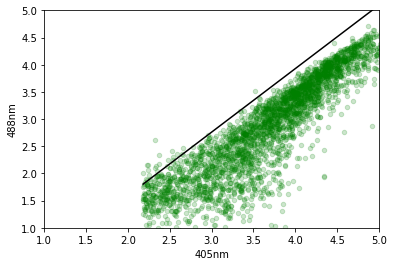

In [39]:
sfGFP11_CLTA_BFP.plot('405nm', '488nm', kind='scatter', c='green', alpha=0.2);
plt.plot(x, (k*x+b), c='black');
plt.xlim(1,5);
plt.ylim(1,5);

In [45]:
## Rescale the data!!
def rescale(y, k, b):
    
    yy = (y-b)/k
    
    return yy

In [81]:
def rescalePlot(data, x_channel, y_channel, gradient, intercept, **kwargs):
    x = data[x_channel]
    y = data[y_channel]
    yy = rescale(y, gradient, intercept)
    
    scatter_settings = {}
    scatter_settings['s']      = kwargs.get('s',2)
    scatter_settings['c']      = kwargs.get('c', 'g')
    scatter_settings['alpha']  = kwargs.get('alpha', 0.2)
    
    x_limits = kwargs.get('x_limits', (1,5))
    y_limits = kwargs.get('y_limits', (1,5))
    x_label  = kwargs.get('x_label', x_channel)
    y_label  = kwargs.get('y_label', y_channel+' - normalized')
    
    diagonal_color = kwargs.get('linecolor', 'k')
    
    #Plot the scatter plot
    plt.scatter(x, yy, **scatter_settings);
    plt.xlim(*x_limits);
    plt.ylim(*y_limits);
    plt.xlabel(x_label);
    plt.ylabel(y_label);
    
    #Set the axis to be equal
    plt.gca().set_aspect('equal');
    
    #Add diagonal line
    plt.plot(x_limits, y_limits, c=diagonal_color);
    
    plt.yticks([1,2,3,4,5]); 

In [23]:
rescalePlot(fl_sfGFP, '405nm', '488nm', k, b, linecolor='k');
plt.title('sfGFP-CLTA-BFP');

NameError: name 'rescalePlot' is not defined

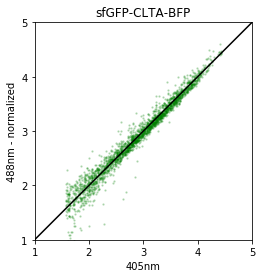

In [46]:
data = fl_sfGFP
x = data['405nm']
y = data['488nm']
yy = rescale(y, k, b)

plt.scatter(x, yy, s=2, c='g', alpha=0.2);
plt.xlim(1,5);
plt.ylim(1,5);
plt.gca().set_aspect('equal');
plt.plot([1,5],[1,5], c='k');
plt.xlabel('405nm');
plt.ylabel('488nm - normalized');
plt.yticks([1,2,3,4,5]);
plt.title('sfGFP-CLTA-BFP');

In [ ]:
##For the original fitting, consider dividing 405nm into bins and plotting the mean +/- std

slope:0.873948 intercept:-0.722523 p_value: 0.000000 std_err:0.011689 


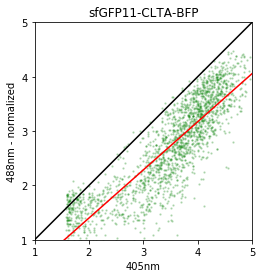

In [48]:
data = sfGFP
x = data['405nm']
y = data['488nm']
yy = rescale(y, k, b)

plt.scatter(x, yy, s=2, c='g', alpha=0.2);
plt.xlim(1,5);
plt.ylim(1,5);
plt.gca().set_aspect('equal');
plt.plot([1,5],[1,5], c='k');
plt.xlabel('405nm');
plt.ylabel('488nm - normalized');
plt.yticks([1,2,3,4,5]);
plt.title('sfGFP11-CLTA-BFP');

#Fit the raw data and rescale the fit line for plotting
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope:%f intercept:%f p_value: %f std_err:%f " % (slope, intercept, p_value, std_err))
sfGFP11_CLTA_BFP_slope = slope
sfGFP11_CLTA_BFP_intercept = intercept
sfGFP11_CLTA_BFP_std = std_err

xx = pd.Series([1,5])

l = (sfGFP11_CLTA_BFP_slope * xx + sfGFP11_CLTA_BFP_intercept)
ll = rescale(l, k, b)

plt.plot(xx, ll, c='r');

In [86]:
Clover_mutation = transfected_mNG3_1_log10_singlets[transfected_mNG3_1_log10_singlets.File.eq(1)]

slope:0.141681 intercept:0.834726 p_value: 0.000000 std_err:0.007331 


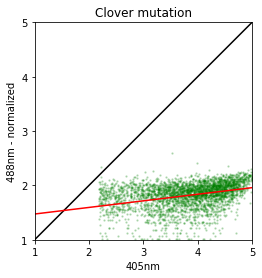

In [87]:
data = Clover_mutation
x = data['405nm']
y = data['488nm']
yy = rescale(y, k, b)

plt.scatter(x, yy, s=2, c='g', alpha=0.2);
plt.xlim(1,5);
plt.ylim(1,5);
plt.gca().set_aspect('equal');
plt.plot([1,5],[1,5], c='k');
plt.xlabel('405nm');
plt.ylabel('488nm - normalized');
plt.yticks([1,2,3,4,5]);
plt.title('Clover mutation');

#Fit the raw data and rescale the fit line for plotting
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope:%f intercept:%f p_value: %f std_err:%f " % (slope, intercept, p_value, std_err))
sfGFP11_CLTA_BFP_slope = slope
sfGFP11_CLTA_BFP_intercept = intercept
sfGFP11_CLTA_BFP_std = std_err

xx = pd.Series([1,5])

l = (sfGFP11_CLTA_BFP_slope * xx + sfGFP11_CLTA_BFP_intercept)
ll = rescale(l, k, b)

plt.plot(xx, ll, c='r');

In [88]:
mClover3_mutations = transfected_mNG3_1_log10_singlets[transfected_mNG3_1_log10_singlets.File.eq(2)]

slope:0.860734 intercept:-1.208443 p_value: 0.000000 std_err:0.008325 


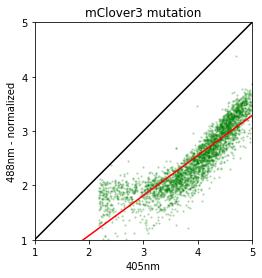

In [89]:
data = mClover3_mutations
x = data['405nm']
y = data['488nm']
yy = rescale(y, k, b)

plt.scatter(x, yy, s=2, c='g', alpha=0.2);
plt.xlim(1,5);
plt.ylim(1,5);
plt.gca().set_aspect('equal');
plt.plot([1,5],[1,5], c='k');
plt.xlabel('405nm');
plt.ylabel('488nm - normalized');
plt.yticks([1,2,3,4,5]);
plt.title('mClover3 mutation');

#Fit the raw data and rescale the fit line for plotting
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope:%f intercept:%f p_value: %f std_err:%f " % (slope, intercept, p_value, std_err))
sfGFP11_CLTA_BFP_slope = slope
sfGFP11_CLTA_BFP_intercept = intercept
sfGFP11_CLTA_BFP_std = std_err

xx = pd.Series([1,5])

l = (sfGFP11_CLTA_BFP_slope * xx + sfGFP11_CLTA_BFP_intercept)
ll = rescale(l, k, b)

plt.plot(xx, ll, c='r');

In [ ]:
#this is clearly not a good fit. We can find the inflection point

In [ ]:
##Found help on https://stackoverflow.com/questions/29382903/how-to-apply-piecewise-linear-fit-in-python

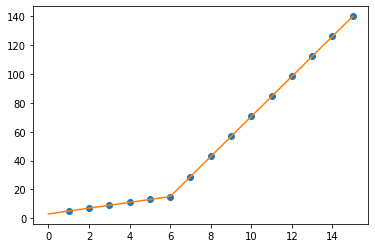

In [72]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13, 14, 15], dtype=float)
y = np.array([5, 7, 9, 11, 13, 15, 28.92, 42.81, 56.7, 70.59, 84.47, 98.36, 112.25, 126.14, 140.03])

def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

p , e = optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(0, 15, 100)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p));

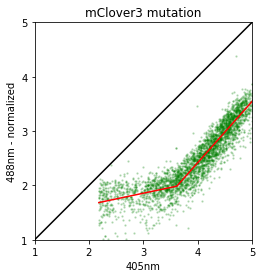

In [90]:
data = mClover3_mutations
x = data['405nm']
y = data['488nm']
yy = rescale(y, k, b)

x = np.array(x)
y = np.array(yy)

p , e = optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(x.min(), x.max(), 100)
plt.scatter(x, y, s=2, c='g', alpha=0.2)
plt.plot(xd, piecewise_linear(xd, *p), c='r');
plt.xlim(1,5);
plt.ylim(1,5);
plt.plot([1,5],[1,5], c='k');
plt.gca().set_aspect('equal');
plt.xlabel('405nm');
plt.ylabel('488nm - normalized');
plt.yticks([1,2,3,4,5]);
plt.title('mClover3 mutation');

In [96]:
x0, y0, k1, k2 = p
print('Gradient 1 =', k1)
print('Gradient 2 =', k2)
print('Inflection Point =', x0)

Gradient 1 = 0.2103577262626831
Gradient 2 = 1.1273249033839354
Inflection Point = 3.6180235887411274


In [ ]:
#How do I find the inflection, point, and what would it mean?